# Assignment 3 Exercise 1
# Group 3 

Importing relevant modules 

In [1]:
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import roc_curve, auc, roc_auc_score

Using TensorFlow backend.


Defining the function to generate training and validation data. Note that *val_gen* consists of batches of size 32 and *val_gen_full* is one single batch.

In [2]:
def get_pcam_generators(base_dir, train_batch_size=32, val_batch_size=32, IMAGE_SIZE=96):
     # dataset parameters
    TRAIN_PATH = os.path.join(base_dir, 'train+val', 'train')
    VALID_PATH = os.path.join(base_dir, 'train+val', 'valid')

    RESCALING_FACTOR = 1./255
      
    #instantiate data generators
    datagen = ImageDataGenerator(rescale=RESCALING_FACTOR)
    train_gen = datagen.flow_from_directory(TRAIN_PATH,
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                             batch_size=train_batch_size,
                                             class_mode='binary')

    val_gen = datagen.flow_from_directory(VALID_PATH,
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                             batch_size=val_batch_size,
                                             class_mode='binary',
                                             shuffle=False)
    val_gen_full = datagen.flow_from_directory(VALID_PATH,
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                             batch_size=16000,
                                             class_mode='binary',
                                             shuffle=False)
    return train_gen, val_gen, val_gen_full

Loading data and importing model

In [3]:
train_gen, val_gen, val_gen_full = get_pcam_generators('C:/Users/Daniel/Documents') #Path to training data
json_file = open('my_first_cnn_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('my_first_cnn_model_weights.hdf5')
print('Loaded model from disk') 

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.
Loaded model from disk


*x_val* consists of the image data, *y_val* consists of the corresponding labels

In [4]:
x_val = val_gen_full[0][0]
y_val = val_gen_full[0][1]

In [5]:
print('x_val:',x_val.shape)
print('y_val:',y_val.shape)

x_val: (16000, 96, 96, 3)
y_val: (16000,)


y_val: 0.0


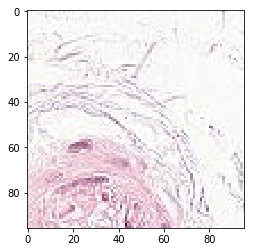

In [6]:
print('y_val:',y_val[65])
plt.imshow(x_val[65])
plt.show()

Predictions can now be made and a ROC curve can be generated

In [7]:
predictions = loaded_model.predict([x_val])

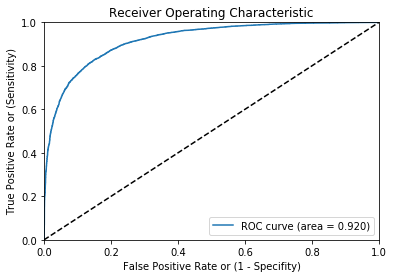

AUC: 0.920


In [8]:
fpr, tpr, _ = roc_curve(y_val, predictions)
auc_val = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % auc_val)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print('AUC: {:.3f}'.format(auc_val))

In [9]:
print(roc_auc_score(y_val,predictions))

0.9200147812499999
